In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif

In [23]:
data=pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
print('Columns:',list(data))
print(' number of columns:',len(list(data)))

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
 number of columns: 31


No. of genuine transaction=  284315
No. of fraud transaction=  492


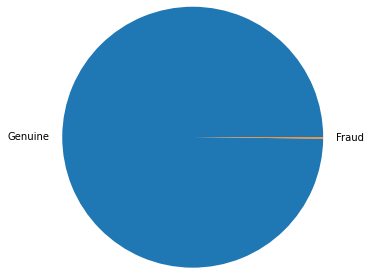

In [25]:
n_genuine=len(data[data['Class']==0])
n_fraud=len(data[data['Class']==1])
print('No. of genuine transaction= ',n_genuine)
print('No. of fraud transaction= ',n_fraud)

plt.pie([n_genuine, n_fraud],labels=['Genuine','Fraud'],radius=1.5)
plt.show()

In [26]:
#seperating features and labels
x=data.iloc[:,:-1]#x denotes columns
y=data.iloc[:,-1]#y denotes labels
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [28]:
#select features using selectkbest
k = 10 # #no.of features
k_best = SelectKBest(f_classif , k=k)#calculate score for each feature using f_classif score function
k_best.fit(x,y)

SelectKBest()

In [29]:
#check whether the feature is among kbest or not
mask=k_best.get_support()
mask

array([False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [30]:
not_mask=np.logical_not(mask)
not_mask

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [31]:
#classify features as best or bad features
all_features=np.array(list(x))

best_features= all_features[mask]
bad_features= all_features[not_mask]

print('Best Features :',best_features)
print('Bad Features :',bad_features)

Best Features : ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad Features : ['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [32]:
#dropping the bad features from x
x=x.drop(bad_features,axis=1)
x.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [33]:
#visualizing the best and bad features using seaborn
def plot_fraud_genuine(features,data):
    plt_index=0
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(top=0.99,bottom=0.01,hspace=1.5,wspace=0.4)
    
    for feature in features:
        plt_index += 1
        feature_data=pd.concat([data[feature],data['Class']],axis=1)
        fraud=feature_data[data['Class']==1]
        genuine=feature_data[data['Class']==0]
        if len(genuine>10000):
            genuine=genuine[::100]
        plt.subplot(5,5,plt_index)
        sns.displot(fraud[feature])
        sns.displot(genuine[feature])
        plt.title(feature)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


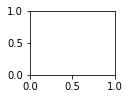

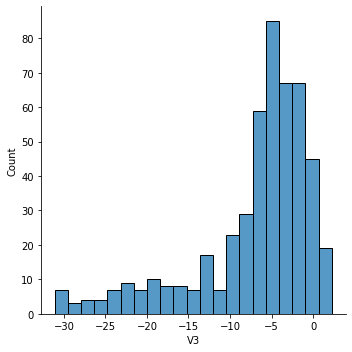

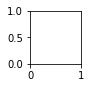

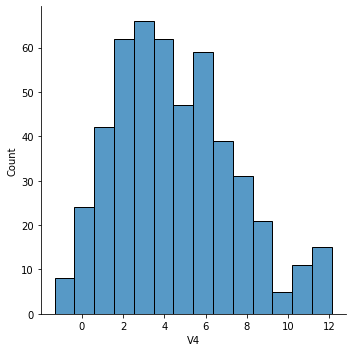

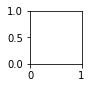

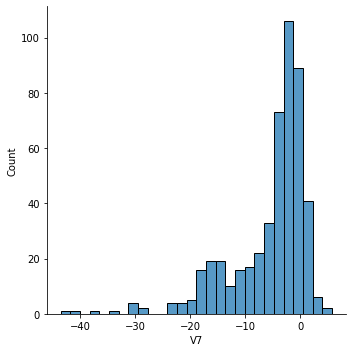

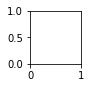

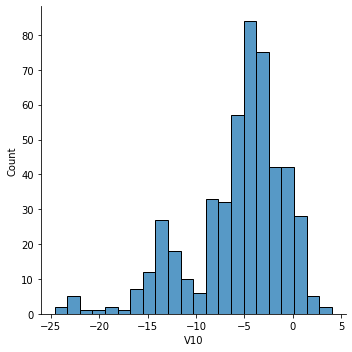

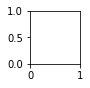

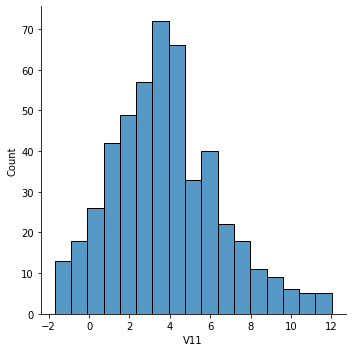

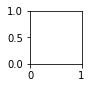

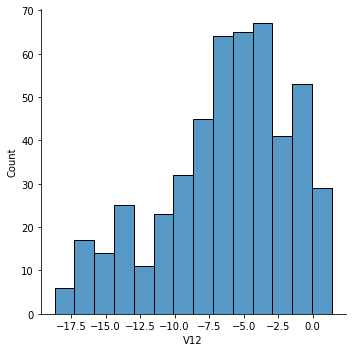

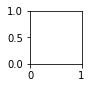

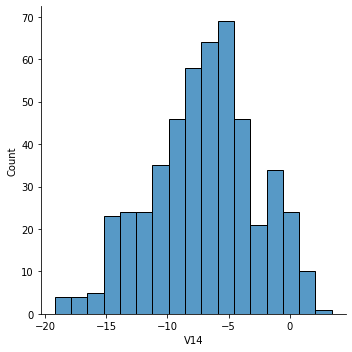

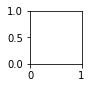

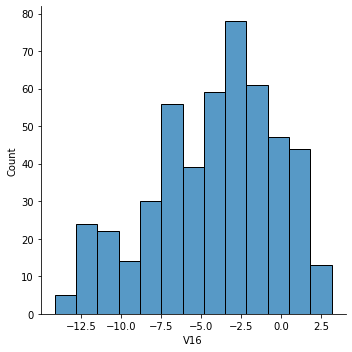

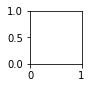

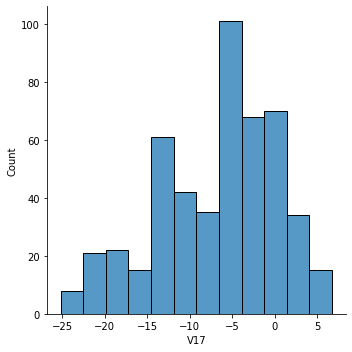

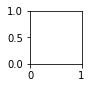

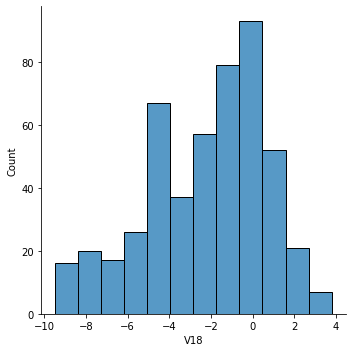

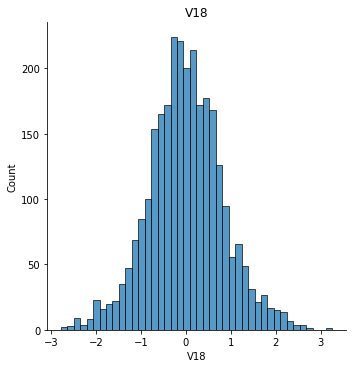

In [34]:
plot_fraud_genuine(best_features,data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

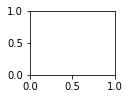

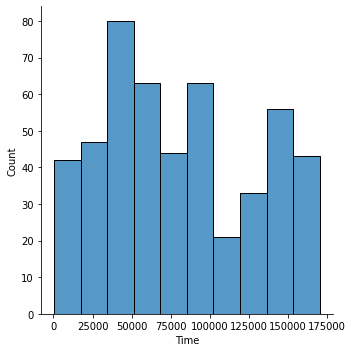

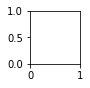

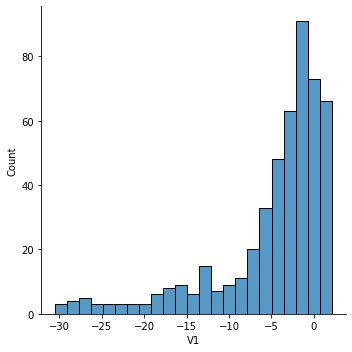

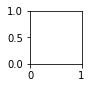

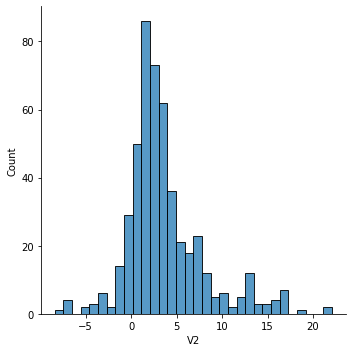

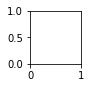

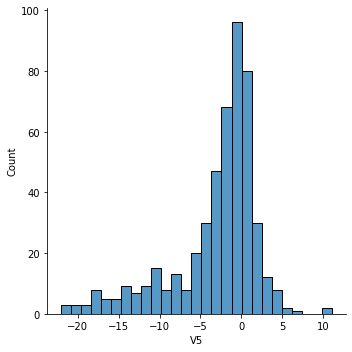

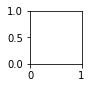

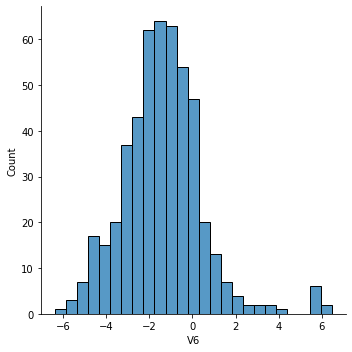

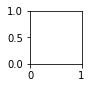

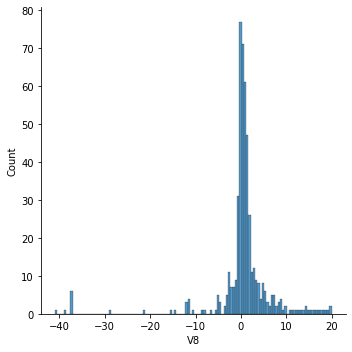

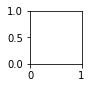

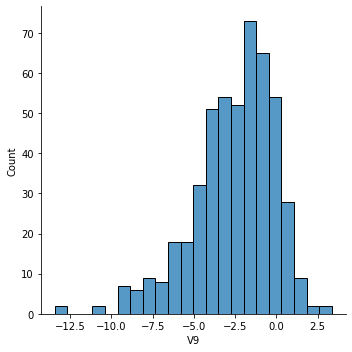

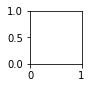

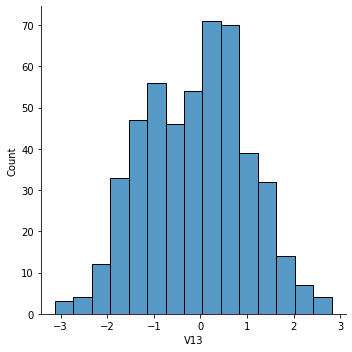

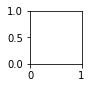

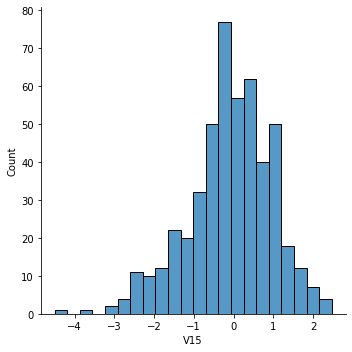

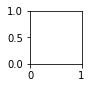

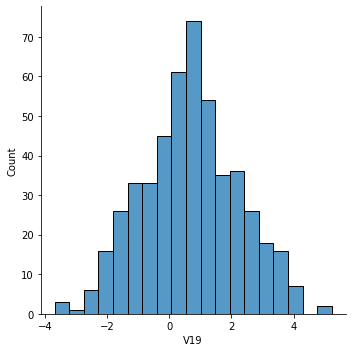

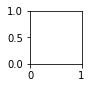

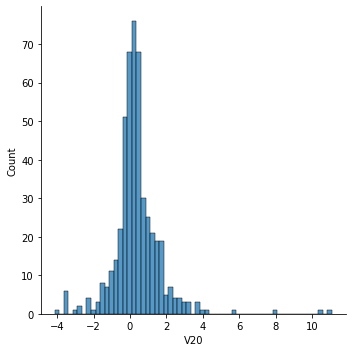

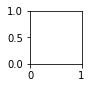

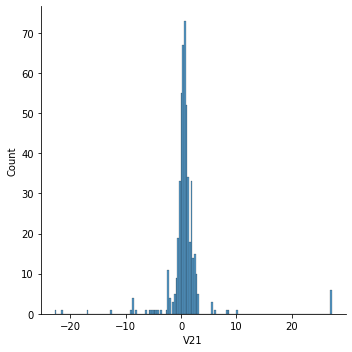

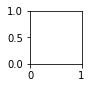

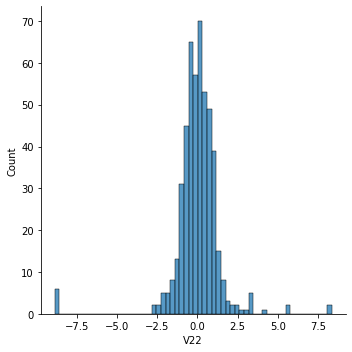

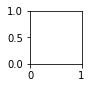

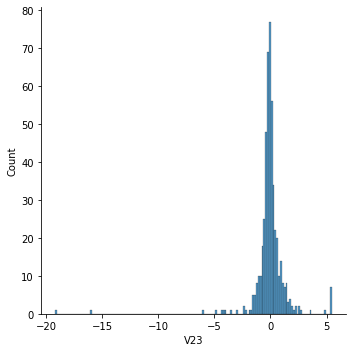

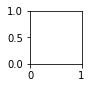

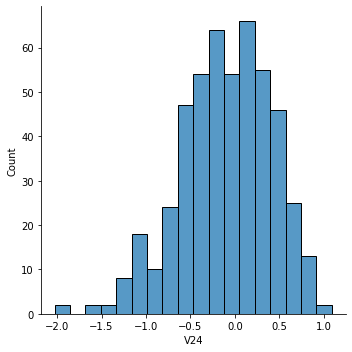

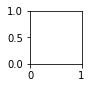

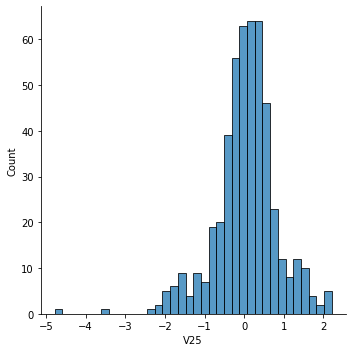

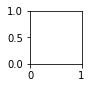

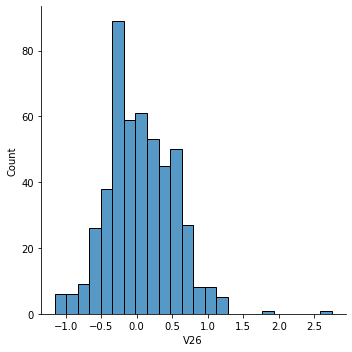

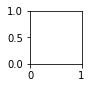

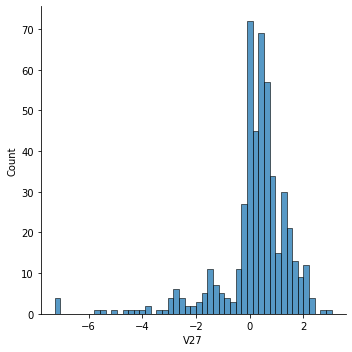

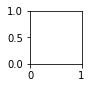

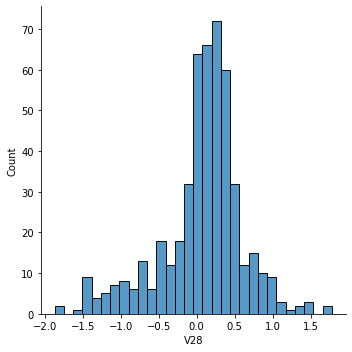

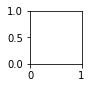

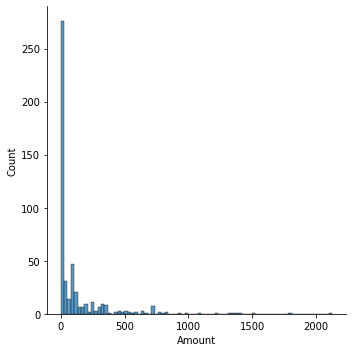

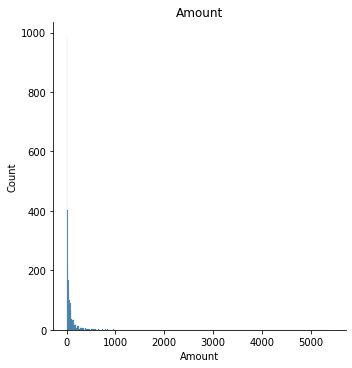

In [35]:
plot_fraud_genuine(bad_features, data)

In [36]:
#spliting the data into test and train datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
#training the model using cross validation because the no.of fraud transactions are very less as comparedto genuiue transactions
nb=GaussianNB()
cv_results=cross_validate(nb,x_train,y_train,cv=10,scoring='recall',return_train_score=True,return_estimator=True)

print('Training scores from each fold:',cv_results['train_score'])
max_score_index = np.argmax(cv_results['train_score'])
best_estimator=cv_results['estimator'][max_score_index]

Training scores from each fold: [0.84985836 0.8611898  0.8470255  0.85227273 0.86363636 0.84985836
 0.85552408 0.85835694 0.86402266 0.84419263]


In [38]:
def plot_confusion_matrix( cm, classes,
                           normalize=False,
                           title=None,
                           cmap=plt.cm.Blues):
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest' , cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.setp(ax.get_xticklabels() , rotation=45 , ha="right",
             rotation_mode="anchor")
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm,shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha="center",va ="center",
                   color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [39]:
def display_results(estimator, x, y):
    predicted = estimator.predict(x)
    cm = confusion_matrix(y,predicted)
    report = classification_report(y, predicted)
    print(report)
    plot_confusion_matrix(cm, classes=['Genuine', 'Fraud'],title='Fraud detection')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227453
           1       0.15      0.85      0.25       392

    accuracy                           0.99    227845
   macro avg       0.57      0.92      0.62    227845
weighted avg       1.00      0.99      0.99    227845



NameError: ignored

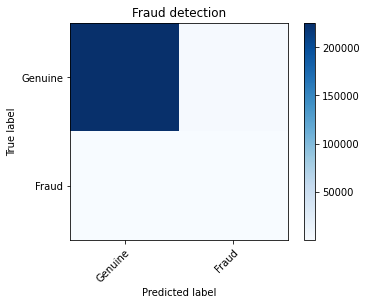

In [40]:
display_results(best_estimator,x_train,y_train)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56862
           1       0.15      0.84      0.25       100

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.62     56962
weighted avg       1.00      0.99      0.99     56962



NameError: ignored

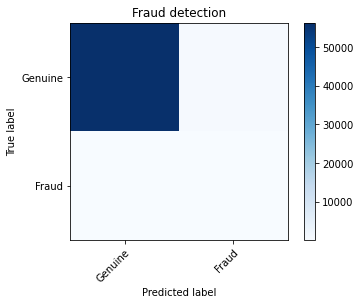

In [41]:
display_results(best_estimator,x_test,y_test)